In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [2]:
# Hyperparmeters
batch_size = 128
learning_rate = 0.001

# Other constants
input_size = 28*28
num_classes = 10

In [3]:
import requests

# Download dataset
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)

# Training validation & test dataset
train_ds, val_ds = random_split(dataset, [50000, 10000])
test_ds = MNIST(root='data/', train=False, transform=transforms.ToTensor())

# Dataloaders
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)
test_loader = DataLoader(test_ds, batch_size*2)

Label: 7


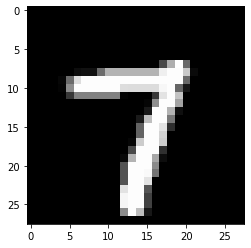

In [4]:
image, label = train_ds[0]
plt.imshow(image[0], cmap='gray')
print('Label:', label)

In [5]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [6]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [7]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [8]:
evaluate(model, val_loader)

{'val_loss': 2.332634210586548, 'val_acc': 0.06015624850988388}

In [9]:
history=fit(500, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9532, val_acc: 0.6357
Epoch [1], val_loss: 1.6801, val_acc: 0.7343
Epoch [2], val_loss: 1.4771, val_acc: 0.7680
Epoch [3], val_loss: 1.3242, val_acc: 0.7844
Epoch [4], val_loss: 1.2071, val_acc: 0.7998
Epoch [5], val_loss: 1.1152, val_acc: 0.8077
Epoch [6], val_loss: 1.0416, val_acc: 0.8156
Epoch [7], val_loss: 0.9815, val_acc: 0.8195
Epoch [8], val_loss: 0.9315, val_acc: 0.8247
Epoch [9], val_loss: 0.8892, val_acc: 0.8284
Epoch [10], val_loss: 0.8531, val_acc: 0.8319
Epoch [11], val_loss: 0.8218, val_acc: 0.8345
Epoch [12], val_loss: 0.7944, val_acc: 0.8373
Epoch [13], val_loss: 0.7701, val_acc: 0.8409
Epoch [14], val_loss: 0.7486, val_acc: 0.8427
Epoch [15], val_loss: 0.7292, val_acc: 0.8440
Epoch [16], val_loss: 0.7117, val_acc: 0.8452
Epoch [17], val_loss: 0.6958, val_acc: 0.8471
Epoch [18], val_loss: 0.6814, val_acc: 0.8488
Epoch [19], val_loss: 0.6681, val_acc: 0.8514
Epoch [20], val_loss: 0.6558, val_acc: 0.8529
Epoch [21], val_loss: 0.6445, val_acc: 0.854

Epoch [177], val_loss: 0.3664, val_acc: 0.8988
Epoch [178], val_loss: 0.3660, val_acc: 0.8990
Epoch [179], val_loss: 0.3657, val_acc: 0.8991
Epoch [180], val_loss: 0.3653, val_acc: 0.8991
Epoch [181], val_loss: 0.3649, val_acc: 0.8991
Epoch [182], val_loss: 0.3646, val_acc: 0.8993
Epoch [183], val_loss: 0.3642, val_acc: 0.8992
Epoch [184], val_loss: 0.3639, val_acc: 0.8992
Epoch [185], val_loss: 0.3635, val_acc: 0.8993
Epoch [186], val_loss: 0.3631, val_acc: 0.8994
Epoch [187], val_loss: 0.3628, val_acc: 0.8995
Epoch [188], val_loss: 0.3625, val_acc: 0.8996
Epoch [189], val_loss: 0.3621, val_acc: 0.8998
Epoch [190], val_loss: 0.3618, val_acc: 0.8998
Epoch [191], val_loss: 0.3614, val_acc: 0.8998
Epoch [192], val_loss: 0.3611, val_acc: 0.8999
Epoch [193], val_loss: 0.3608, val_acc: 0.8999
Epoch [194], val_loss: 0.3604, val_acc: 0.9001
Epoch [195], val_loss: 0.3601, val_acc: 0.9001
Epoch [196], val_loss: 0.3598, val_acc: 0.9002
Epoch [197], val_loss: 0.3595, val_acc: 0.9001
Epoch [198], 

Epoch [352], val_loss: 0.3282, val_acc: 0.9071
Epoch [353], val_loss: 0.3280, val_acc: 0.9072
Epoch [354], val_loss: 0.3279, val_acc: 0.9072
Epoch [355], val_loss: 0.3278, val_acc: 0.9072
Epoch [356], val_loss: 0.3276, val_acc: 0.9073
Epoch [357], val_loss: 0.3275, val_acc: 0.9074
Epoch [358], val_loss: 0.3274, val_acc: 0.9074
Epoch [359], val_loss: 0.3273, val_acc: 0.9077
Epoch [360], val_loss: 0.3271, val_acc: 0.9077
Epoch [361], val_loss: 0.3270, val_acc: 0.9077
Epoch [362], val_loss: 0.3269, val_acc: 0.9078
Epoch [363], val_loss: 0.3268, val_acc: 0.9080
Epoch [364], val_loss: 0.3266, val_acc: 0.9077
Epoch [365], val_loss: 0.3265, val_acc: 0.9078
Epoch [366], val_loss: 0.3264, val_acc: 0.9080
Epoch [367], val_loss: 0.3263, val_acc: 0.9081
Epoch [368], val_loss: 0.3262, val_acc: 0.9081
Epoch [369], val_loss: 0.3260, val_acc: 0.9081
Epoch [370], val_loss: 0.3259, val_acc: 0.9083
Epoch [371], val_loss: 0.3258, val_acc: 0.9083
Epoch [372], val_loss: 0.3257, val_acc: 0.9083
Epoch [373], 

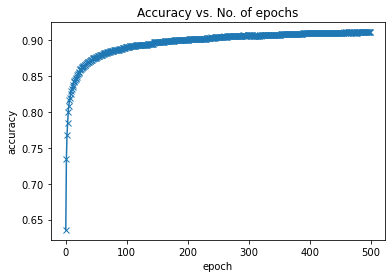

In [10]:
accuracies = [r['val_acc'] for r in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

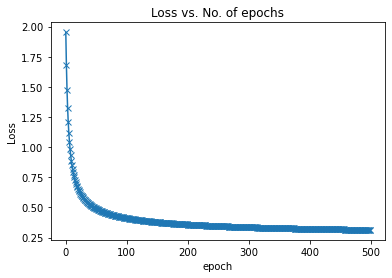

In [11]:
accuracies = [r['val_loss'] for r in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs. No. of epochs');

In [12]:
# Evaluate on test dataset
result = evaluate(model, test_loader)
result

{'val_loss': 0.30095401406288147, 'val_acc': 0.9159179925918579}

In [13]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 2 , Predicted: 2


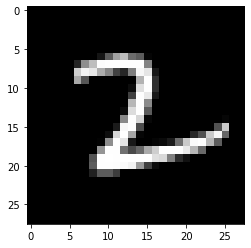

In [14]:
img, label = test_ds[919]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))